In [1]:
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df['Relatives'] = df['SibSp']+df['Parch']

C:\Users\saina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Relatives', ylabel='count'>

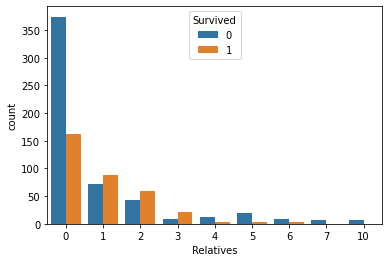

In [6]:
sns.countplot('Relatives',hue='Survived',data=df)

In [7]:
df['Name'][2].split(',')[1].split()[0]

prefix = []
for _ in df['Name']:
    prefix.append(_.split(',')[1].split()[0])
df['Prefix'] = prefix    

In [8]:
print(df[df['Prefix'] == 'Mr.']['Age'].mean())
print(df[df['Prefix'] == 'Mrs.']['Age'].mean())
print(df[df['Prefix'] == 'Miss.']['Age'].mean())
print(df[df['Prefix'] == 'Master.']['Age'].mean())

32.368090452261306
35.898148148148145
21.773972602739725
4.574166666666667


In [9]:
df.loc[(df.Age.isnull())&(df.Prefix=='Mr.'),'Age']=df[df['Prefix'] == 'Mr.']['Age'].mean()
df.loc[(df.Age.isnull())&(df.Prefix=='Mrs.'),'Age']=36
df.loc[(df.Age.isnull())&(df.Prefix=='Miss.'),'Age']=22
df.loc[(df.Age.isnull())&(df.Prefix=='Master.'),'Age']=5

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Relatives        0
Prefix           0
dtype: int64

In [11]:
df.drop(columns = ['PassengerId','Name','Ticket','Cabin','Prefix','SibSp','Parch'],inplace = True)

In [12]:
df['Age'].fillna(df['Age'].median(),inplace = True)
df['Embarked'].fillna('C',inplace = True)

In [13]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Embarked     0
Relatives    0
dtype: int64

In [14]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [15]:
df['Sex'].replace({'male':1,'female':0},inplace = True)

In [17]:
scaler = MinMaxScaler()

In [18]:
scaled = scaler.fit_transform(df[['Age','Fare']])

In [19]:
scaled = pd.DataFrame(scaled,columns = ['Age','Fare'] )

In [20]:
dummy = pd.get_dummies(df['Embarked'], drop_first = True)

In [21]:
df.drop(columns = ['Embarked','Age','Fare'], inplace = True)


In [22]:
df = pd.concat([df,dummy,scaled],axis = 1)

In [23]:
df

,Survived,Pclass,Sex,Relatives,Q,S,Age,Fare
0,0,3,1,1,0,1,0.271174,0.014151
1,1,1,0,1,0,0,0.472229,0.139136
2,1,3,0,0,0,1,0.321438,0.015469
3,1,1,0,1,0,1,0.434531,0.103644
4,0,3,1,0,0,1,0.434531,0.015713
...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,1,0.334004,0.025374
887,1,1,0,0,0,1,0.233476,0.058556
888,0,3,0,3,0,1,0.271174,0.045771
889,1,1,1,0,0,0,0.321438,0.058556


In [164]:
df_test = pd.read_csv('test.csv')

In [166]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [151]:
def sigmoid_fun(x):
    return (1/(1+np.exp(-x)))
def logistic_regression_fit(x_train, y_train,x_test, learning_rate = 0.0001, iterations = 100000):
#     print(X_train)
#     print('mmmmmmmmm')
    x = np.hstack((np.ones((X_train.shape[0], 1)),X_train))
#     print(x)
    x_test = np.hstack((np.ones((x_test.shape[0], 1)),x_test))
    y = y_train
    m,n = x.shape
    tetha = np.append(1,np.random.uniform(0,1,[n-1]))
    for i in range(iterations):
        lin_regress = np.dot(x,tetha)
        y_predict = sigmoid_fun(lin_regress)
#         print(f'linregression = {y_predict.shape}\n y = {y.shape}\n x.T = {x.T.shape}')
        error = y_predict-y
#         print(f'error={error.shape}')
        d_tetha = (1/m)*np.dot(x.T,error)
        tetha = tetha - (learning_rate * d_tetha)
#     print(tetha.shape)
    lin_regress = np.dot(x_test,tetha)
    sigmoid = sigmoid_fun(lin_regress)
    y_predicted = [0 if _<0.5 else 1 for _ in sigmoid ]
    return np.array(y_predicted)
# def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
#     if add_intercept:
#         intercept = np.ones((features.shape[0], 1))
#         features = np.hstack((intercept, features))
        
#     weights = np.zeros(features.shape[1])
    
#     for step in range(num_steps):
#         scores = np.dot(features, weights)
#         predictions = sigmoid(scores)

#         # Update weights with gradient
#         output_error_signal = target - predictions
#         gradient = np.dot(features.T, output_error_signal)
#         weights += learning_rate * gradient 

In [160]:
y_pred = logistic_regression_fit(X_train,y_train,X_test,7e-4,400000)
print(accuracy_score(y_test,y_pred))

0.7932960893854749


In [161]:
y_pred = logistic_regression_fit(X_train,y_train,X_test,3e-3,200000)
print(accuracy_score(y_test,y_pred))

0.7988826815642458


In [162]:
y_pred = logistic_regression_fit(X_train,y_train,X_test,1e-5,400000)
print(accuracy_score(y_test,y_pred))

0.7318435754189944


In [163]:
y_pred = logistic_regression_fit(X_train,y_train,X_test,5e-2,400000)
print(accuracy_score(y_test,y_pred))

0.8044692737430168


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(df[['Pclass','Sex','Relatives','Q','S','Age','Fare']],df['Survived'],test_size = 0.2,random_state = 42)

In [26]:
reg = LogisticRegression()

reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)

print(accuracy)

0.8100558659217877


In [27]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)

classifier.fit(X_train,y_train)

y_predt = classifier.predict(X_test) 

print(accuracy_score(y_test,y_predt))

0.8100558659217877


In [28]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train,y_train)

y_predict = model.predict(X_test)

print(accuracy_score(y_test,y_predict))

0.770949720670391


In [45]:
class LogRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)
            print(X.T)
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T,(y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [46]:
regressor = LogRegression(learning_rate=5e-5, n_iters=1)
regressor.fit(X_train, y_train)
print(X_train)
predictions = regressor.predict(X_test)
print(accuracy_score(y_test,predictions))

                331       733       382       704       813       118  \
Pclass     1.000000  2.000000  3.000000  3.000000  3.000000  1.000000   
Sex        1.000000  1.000000  1.000000  1.000000  0.000000  1.000000   
Relatives  0.000000  0.000000  0.000000  1.000000  6.000000  1.000000   
Q          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
S          1.000000  1.000000  1.000000  1.000000  1.000000  0.000000   
Age        0.566474  0.283740  0.396833  0.321438  0.070118  0.296306   
Fare       0.055628  0.025374  0.015469  0.015330  0.061045  0.483128   

                536       361       29        55   ...       121       614  \
Pclass     1.000000  2.000000  3.000000  1.000000  ...  3.000000  3.000000   
Sex        1.000000  1.000000  1.000000  1.000000  ...  1.000000  1.000000   
Relatives  0.000000  1.000000  0.000000  0.000000  ...  0.000000  0.000000   
Q          0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
S          1.000000  0.00

In [31]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
        
    return weights

In [32]:
weights = logistic_regression(X_train, y_train,num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

-487.1557523345739
-322.4857632411409
-319.83225578816405
-319.3440411204175
-319.2450731102681
-319.2235300165969
-319.21831925113804
-319.21680449971547
-319.21624018242096
-319.21597846763376
-319.21584033607076
-319.2157630592773
-319.2157188327957
-319.21569331174226
-319.2156785431939
-319.215669989521
-319.21566503443694
-319.21566216405523
-319.2156605014302
-319.2156595384585
-319.2156589807563
-319.21565865778285
-319.2156584707524
-319.2156583624488
-319.215658299735
-319.21565826342106
-319.215658242394
-319.21565823021876
-319.21565822316893
-319.215658219087


In [33]:
data_with_intercept = np.hstack((np.ones((X_test.shape[0], 1)),X_test))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print ('Accuracy from scratch: {0}'.format((preds == y_test).sum().astype(float) / len(preds)))

Accuracy from scratch: 0.8044692737430168
